<center><img src="https://www.inquirer.com/resizer/36iHVzIfZvN9d6f8LaimwVDXBbA=/1400x932/smart/cloudfront-us-east-1.images.arcpublishing.com/pmn/FQ7PSG2YV5A2JK27U2ZAKILZXA.jpg" width=820 height=600 /></center>

<center><a href="https://www.inquirer.com/weather/tornado-outbreak-deaths-historic-pennsylvania-weather-may-1985-20200531.html">Photo Credit</a><center>

<h1><center><i> An Analysis of Climate Change and Natural Disasters</i></center></h1>

<center>Brenton Haliw</center>


<hr>
<h2><center> Introduction </center></h2>

As the Earth's climate has changed over the years, we often hear about the effects that this can bring. However, what exactly is affected? Does this mean that there will be more tropical cyclones and tornadoes each year, or will their intesity begin to shift? Would climate change affect the number of wildfires that occur in the world? If so, by how much? In order to answer these questions, I will be comparing and contrasting the numbers to see if there is a trend and what we can expect for the future of our planet if the Earth's climate continues to change.

To learn more about the different types of natural disasters before we begin, please feel free to click on the following links:

[Tropical Cyclones](https://gpm.nasa.gov/education/articles/what-hurricane-typhoon-or-tropical-cyclone)

[Tornadoes](https://www.nssl.noaa.gov/education/svrwx101/tornadoes/)

[Droughts](https://www.nationalgeographic.org/encyclopedia/drought/)

[Wildfires](https://www.nationalgeographic.org/encyclopedia/wildfires/)


<hr>
<h2><center>Data Collection</center></h2>

### Assets to import for data manipulation
In order to fully evaluate the link between climate change and natural disasters, we will import the following items. These packages will allow us to display statistical values, graphs, and a wide variety of ease of programming factors.

In [1]:
# These are our imports that we will use for the project
import re, requests, glob, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Collecting data for global temperature over the years
Our first order of business is to actually collect the data that we want to use to make these comparisons. Therefore, a good place to start would be to get data about the global temperature and the number of different natural disasters that occur around the world.

By using the table from [NOAA](https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2019), we can see what the global temperature anomaly each year is starting from 1880. This shows if the global temperature was above or below the estimated global temperature under normal conditions.

In [2]:
# Reading the CSV file for the global temperature anomaly
temp_anomaly_df = pd.read_csv("files/temperature/data.csv")
temp_anomaly_df

,Global Land and Ocean Temperature Anomalies,January-December
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999,NaN
3,Year,Value
4,1880,-0.12
...,...,...
139,2015,0.93
140,2016,1.00
141,2017,0.91
142,2018,0.83


### Collecting data about different types of natural disasters
Next, we will collect data concerning natural disasters. The CSV files were downloaded from [NOAA](https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/) and contain information about significant weather events, dating all the way back to 1954. 

I saved all of the files to a folder, and then used a for loop to go through each CSV file. I created a temporary dataframe to hold onto the current year's information, and then I added the temporary dataframe to the main dataframe to be utilized later. 

In [3]:
# Creating the dataframes to store our information
storm_df = pd.DataFrame()
temp_csv = pd.DataFrame()

# The for loop will read each CSV file in the 'storm' folder and then add it to the storm dataframe.
for name in glob.glob("files/storm/*.csv"):
    # Creates a temporary dataframe containing the information related to the current storm data
    temp_csv = pd.read_csv(name, low_memory=False)
    # Appending the temporary storm dataframe to the main dataframe
    storm_df = storm_df.append(temp_csv, ignore_index=True)
    
storm_df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.1200,-99.2000,35.1700,-99.2000,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,...,0.0,NaN,NaN,31.9000,-98.6000,31.7300,-98.6000,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.5800,-75.7000,40.6500,-75.4700,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.6000,-76.7500,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.6300,-79.6800,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649644,202006,18,600,202006,19,600,147668.0,899187,IOWA,19.0,...,1.0,S,HAMPTON,42.7400,-93.2000,42.7400,-93.2000,An upper-level trough with associated surface ...,Coop observer reported a 24 hour rainfall tota...,CSV
1649645,202006,18,600,202006,19,600,147668.0,899188,IOWA,19.0,...,1.0,N,HAMPTON,42.7600,-93.2000,42.7600,-93.2000,An upper-level trough with associated surface ...,Coop observer reported a 24 hour rainfall tota...,CSV
1649646,202006,22,2320,202006,24,915,148769.0,899497,IOWA,19.0,...,0.0,E,TRAER,42.2000,-92.4700,42.2003,-92.4637,A surface low to the northwest of Iowa allowed...,The department of transportation relayed a rep...,CSV
1649647,202006,23,38,202006,24,915,148769.0,899498,IOWA,19.0,...,0.0,E,TRAER,42.2000,-92.4700,42.2001,-92.4647,A surface low to the northwest of Iowa allowed...,Iowa Department of Transportation and the Tama...,CSV


### Collecting data about tropical cyclones over the years
Finally, I used [NOAA](https://www.nhc.noaa.gov/data/) to obtain data relating to tropical cyclones that have spawned in the Atlantic Ocean and the Pacific Ocean. Here, I just opened up the CSV files containing information about the tropical cyclones and then created their respective dataframes through Pandas' read_csv() function.

These files contain information about different types of cyclones, such as tropical storms, tropical depressions, and hurricanes/typhoons. Most importantly, it has the maximum sustained windspeed for each stage of the cyclone's life.

In [4]:
# Create a dataframe by reading the CSV file
atlantic_df = pd.read_csv("files/hurricane/hurdat2-1851-2019-052520.txt", low_memory=False)
atlantic_df

AL011851  \
18510625  0000     HU  28.0N   94.8W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          0600     HU  28.0N   95.4W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          1200     HU  28.0N   96.0W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          1800     HU  28.1N   96.5W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          2100  L  HU  28.2N   96.8W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
...                                                                                                                   ...   
20191126  1200     EX  52.2N    9.3W 45.0  970.0  90.0   240.0  120.0  90.0   0.0    0.0    0.0    0.0    0.0         0.0   
          1800     EX  52.2N    8.9W 40.0  972.0  90.0   240.0  90.0   90.0   0.0    0.0    0.0    0.0    0.0         0.0   
20191127  0000     EX  51.8N    8.2W 40.0  974.0  0.0    210.0  90.0   0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          0600     EX  51.4N    6.0W 40.0  976.0  0.0    180.0  90.0   0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          1200     EX  51.3N    2.1W 40.0  980.0  0.0    120.0  90.0   0.0    0.0    0.0    0.0    0.0    0.0         0.0   

                                                                                                                             UNNAMED  \
18510625  0000     HU  28.0N   94.8W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          0600     HU  28.0N   95.4W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          1200     HU  28.0N   96.0W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          1800     HU  28.1N   96.5W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          2100  L  HU  28.2N   96.8W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
...                                                                                                                              ...   
20191126  1200     EX  52.2N    9.3W 45.0  970.0  90.0   240.0  120.0  90.0   0.0    0.0    0.0    0.0    0.0                    0.0   
          1800     EX  52.2N    8.9W 40.0  972.0  90.0   240.0  90.0   90.0   0.0    0.0    0.0    0.0    0.0                    0.0   
20191127  0000     EX  51.8N    8.2W 40.0  974.0  0.0    210.0  90.0   0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          0600     EX  51.4N    6.0W 40.0  976.0  0.0    180.0  90.0   0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          1200     EX  51.3N    2.1W 40.0  980.0  0.0    120.0  90.0   0.0    0.0    0.0    0.0    0.0    0.0                    0.0   

                                                                                                                      14  \
18510625  0000     HU  28.0N   94.8W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          0600     HU  28.0N   95.4W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          1200     HU  28.0N   96.0W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          1800     HU  28.1N   96.5W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          2100  L  HU  28.2N   96.8W 80.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
...                                                                                                                  ...   
20191126  1200     EX  52.2N    9.3W 45.0  970.0  90.0   240.0  120.0  90.0   0.0    0.0    0.0    0.0    0.0  

In [5]:
# Create a dataframe by reading the CSV file
pacific_df = pd.read_csv("files/hurricane/hurdat2-nepac-1949-2019-042320.txt")
pacific_df

EP011949  \
19490611  0000     TS  20.2N  106.3W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          0600     TS  20.2N  106.4W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          1200     TS  20.2N  106.7W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          1800     TS  20.3N  107.7W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
19490612  0000     TS  20.4N  108.6W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
...                                                                                                                    ...   
20191117  0600     TD  10.0N  102.2W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          1200     TD  10.4N  102.9W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          1800     TD  11.0N  103.6W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
20191118  0000     TD  11.7N  104.2W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          0600     TD  12.2N  104.8W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   

                                                                                                                              UNNAMED  \
19490611  0000     TS  20.2N  106.3W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          0600     TS  20.2N  106.4W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          1200     TS  20.2N  106.7W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          1800     TS  20.3N  107.7W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
19490612  0000     TS  20.4N  108.6W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
...                                                                                                                               ...   
20191117  0600     TD  10.0N  102.2W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          1200     TD  10.4N  102.9W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          1800     TD  11.0N  103.6W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
20191118  0000     TD  11.7N  104.2W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          0600     TD  12.2N  104.8W 25.0  1007.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   

                                                                                                                        7  \
19490611  0000     TS  20.2N  106.3W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          0600     TS  20.2N  106.4W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          1200     TS  20.2N  106.7W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          1800     TS  20.3N  107.7W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
19490612  0000     TS  20.4N  108.6W 45.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
...                                                                                                                   ...   
20191117  0600     TD  10.0N  102.2W 25.0  1007.0  0.0    0.0    0.0    0.0    0.

<hr>
<h2><center>Data Processing</center></h2>

### Global Temperature DataFrame

Now that we have all of our required data, we need to be able to make sense of it. For example, our global temperature anomaly file that we read with Pandas was not formatted correctly, giving us a dataframe with unneeded rows.

In order to make it usable later on in the project, I removed the first four rows of data, renamed the headers for the columns, and removed whitespace after the values in the Celsius column. The Year and Celsius columns were give their correct data types and the processing was complete for this dataframe.

In [6]:
# Dropping unneeded rows due to formatting issues
temp_anomaly_df = temp_anomaly_df.drop([0, 1, 2, 3], axis=0)

# Renaming columns to their appropriate values
temp_anomaly_df = temp_anomaly_df.rename(columns={"Global Land and Ocean Temperature Anomalies": "YEAR", " January-December": "Celsius"})

for item in temp_anomaly_df["Celsius"]:
    item = item.strip()

# Changing column types to fit their intended types
temp_anomaly_df["Celsius"] = temp_anomaly_df["Celsius"].astype(float)
temp_anomaly_df["YEAR"] = temp_anomaly_df["YEAR"].astype(int)

# Fixing the index of the dataframe
temp_anomaly_df = temp_anomaly_df.reset_index()
temp_anomaly_df = temp_anomaly_df.drop("index", axis=1)
temp_anomaly_df.index += 1
temp_anomaly_df

,YEAR,Celsius
1,1880,-0.12
2,1881,-0.09
3,1882,-0.10
4,1883,-0.18
5,1884,-0.27
...,...,...
136,2015,0.93
137,2016,1.00
138,2017,0.91
139,2018,0.83


### Dissecting the Storm DataFrame
Looking through all one million rows of our storm dataframe, we see that there are a lot of entries that we don't really need. In order to highlight some of the more pressing natural disasters, we'll iterate through the rows of the storm dataframe and create separated dataframes for each natural disaster that we want to focus on (tornadoes, droughts, and wildfires)

By using a for loop, we iterate through each row and use an if statement to locate the type of natural disaster that we want to focus on. Once we find the natural disaster, we then add that row to a list to be stored for creating the specific dataframe.

In [7]:
# Creating lists to store the rows for the applicable dataframes
tornado_row_list = []
drought_row_list = []
wildfire_row_list = []

# Iterrating through the rows of the storm dataframe and assigning the rows to the correct list
for index, row in storm_df.iterrows():
    if row["EVENT_TYPE"] == "Tornado":
        tornado_row_list.append(row)
    
    if row["EVENT_TYPE"] == "Drought":
        drought_row_list.append(row)

    if row["EVENT_TYPE"] == "Wildfire":
        wildfire_row_list.append(row)

columns = ["YEAR", "BEGIN_DATE_TIME", "STATE", "DAMAGE_PROPERTY"]
tornado_columns = columns + ["TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", "BEGIN_LAT", "BEGIN_LON"]

Now that we have our information that we want to use, we can go ahead and create our dataframes for the natural disasters that we chose.

### Tornado DataFrame Creation
To create the tornado dataframe, I used the list of tornado columns that I created above, and the list containing the rows of data to populate our new dataframe with. Once I did this, I cleaned up the indices of the dataframe to allow them to start from 1 instead of 0.

In [8]:
# Creating a temporary dataframe to store all the information collected from original storm dataframe
temp_df = pd.DataFrame()
temp_df = temp_df.append(tornado_row_list)

# Creating the tornado dataframe with only the columns that we want
tornado_df = temp_df.filter(tornado_columns)

# Cleaning up the indices of the tornado dataframe
tornado_df = tornado_df.reset_index(drop=True)
tornado_df.index += 1
tornado_df

,YEAR,BEGIN_DATE_TIME,STATE,DAMAGE_PROPERTY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON
1,1950,28-APR-50 14:45:00,OKLAHOMA,250K,F3,3.40,400.0,35.1200,-99.2000
2,1950,29-APR-50 15:30:00,TEXAS,25K,F1,11.50,200.0,31.9000,-98.6000
3,1950,05-JUL-50 18:00:00,PENNSYLVANIA,25K,F2,12.90,33.0,40.5800,-75.7000
4,1950,05-JUL-50 18:30:00,PENNSYLVANIA,2.5K,F2,0.00,13.0,40.6000,-76.7500
5,1950,24-JUL-50 14:40:00,PENNSYLVANIA,2.5K,F0,0.00,33.0,41.6300,-79.6800
...,...,...,...,...,...,...,...,...,...
71969,2020,04-JUN-20 01:59:00,MISSOURI,NaN,EF0,0.63,40.0,38.4719,-94.3316
71970,2020,28-JUN-20 19:54:00,MINNESOTA,2.00K,EF0,0.61,20.0,44.0318,-91.7238
71971,2020,10-JUN-20 17:18:00,OHIO,50.00K,EF0,5.90,300.0,39.3786,-83.0791
71972,2020,07-JUN-20 17:41:00,FLORIDA,0.00K,EF0,0.50,20.0,28.7914,-81.7040


### Drought DataFrame Creation
The drought and the wildfire dataframes will be created in the same way as the tornado dataframe. The dataframe contains columns about what state the drought and wildfire occurred in, the date, and whether or not there was any property damage because of it.

In [9]:
# Creating a temporary dataframe to store all the information collected from original storm dataframe
temp_df = pd.DataFrame()
temp_df = temp_df.append(drought_row_list)

# Creating the drought dataframe with only the columns that we want
drought_df = temp_df.filter(columns)

# Cleaning up the indices of the drought dataframe
drought_df = drought_df.reset_index(drop=True)
drought_df.index += 1
drought_df

,YEAR,BEGIN_DATE_TIME,STATE,DAMAGE_PROPERTY
1,1996,01-MAY-96 00:00:00,TEXAS,.1M
2,1996,01-MAY-96 00:00:00,TEXAS,.1M
3,1996,01-MAY-96 00:00:00,TEXAS,.1M
4,1996,01-MAY-96 00:00:00,TEXAS,.1M
5,1996,01-MAY-96 00:00:00,TEXAS,.1M
...,...,...,...,...
56458,2020,01-JUN-20 00:00:00,KANSAS,0.00K
56459,2020,01-JUN-20 00:00:00,OKLAHOMA,0.00K
56460,2020,01-JUN-20 00:00:00,KANSAS,0.00K
56461,2020,01-JUN-20 00:00:00,TEXAS,0.00K


### Wildfire DataFrame Creation

In [10]:
# Creating a temporary dataframe to store all the information collected from original storm dataframe
temp_df = pd.DataFrame()
temp_df = temp_df.append(wildfire_row_list)

# Creating the wildfire dataframe with only the columns that we want
wildfire_df = temp_df.filter(columns)

# Cleaning up the indices of the wildfire dataframe
wildfire_df = wildfire_df.reset_index(drop=True)
wildfire_df.index += 1
wildfire_df

,YEAR,BEGIN_DATE_TIME,STATE,DAMAGE_PROPERTY
1,1996,24-FEB-96 10:45:00,KANSAS,.25M
2,1996,04-MAR-96 12:00:00,FLORIDA,NaN
3,1996,15-FEB-96 10:00:00,TEXAS,NaN
4,1996,22-FEB-96 08:00:00,TEXAS,NaN
5,1996,02-MAR-96 12:00:00,TEXAS,NaN
...,...,...,...,...
7367,2020,28-JUN-20 12:36:00,COLORADO,0.00K
7368,2020,15-JUN-20 13:30:00,COLORADO,0.00K
7369,2020,05-JUN-20 15:49:00,COLORADO,0.00K
7370,2020,04-JUN-20 17:00:00,CALIFORNIA,0.00K


### Tropical Cyclone DataFrame Creation
Unfortunately, the files containing the information for tropical cyclones were not clearly laid, and resulted in a dataframe that was almost unusable. Therefore, I had to completely redo everything and create another text file that would be able to be read by Pandas.

I created a function called create_cyclone_df, where you pass in the read and write paths for the data files. Within the function, we open up the read_file and use a for loop to read through each line. We can write new lines this way with the designator and the name of the cyclone at the start of each line. This way, we can use Pandas functions such as groupby() later on in the project to group together data points for manipulation.

After redoing the new text file, we can then read it with the Pandas function read_csv(), and this will create a dataframe. We then create our column headers and ensure that the data in those columns is the correct type. Once everything is complete, we then return our newly created dataframe for use.

In [11]:
# Creating a function to create tropical cyclone dataframes so we don't duplicate code
def create_cyclone_df(read_file_path, write_file_path):
    # Open files for reading and writing
    file = open(read_file_path, "r")
    new_file = open(write_file_path, "w")
    
    # Temporary variables to use within the for loop
    cyclone_designator = ""
    cyclone_name = ""
        
    # Looping through the lines in the file. New Tropical Cyclones are denoted by two letters followed by cylone number and YYYY
    # Therefore, we will identify these lines first, and then move this information to each line for the tropical cyclone.
    #
    # Example: AL011851, UNNAMED
    #          18510625, 0000, .....
    #          18510625, 0200, .....
    #
    # Will be:  AL011851, UNNAMED, 18510625, 0000, ....
    #           AL011851, UNNAMED, 18510625, 0200, ....
    for line in file:
        # Check if the line starts with two characters followed by the cyclone number and date
        if re.search("^[A-Z]{2}\d+", line):
            # Split the line into an array of strings at each comma
            split = line.split(",")
            # Assign our variables the values in the array and remove any whitespace
            cyclone_designator = split[0].strip()
            cyclone_name = split[1].strip()
    
        # Writing a new line to our file
        else:
            new_line = cyclone_designator + ", " + cyclone_name + ", " + line
            new_file.write(new_line)
    
    # Closing the files since we don't need them anymore
    new_file.close()
    file.close()
    
    # Creating the cyclone dataframe from the new file
    column_names = ["Designator", "Name", "Date_Group", "Time", "Record_Identifier", "Status", "Lat", "Long", "Max_Wind_(mph)", "Central_Pressure_(mbar)"]
    
    # Reading our new file and creating the dataframe
    cyclone_df = pd.read_csv(write_file_path, header=None, low_memory=False)
    
    # Tidy up the data within the dataframe
    cyclone_df = cyclone_df.drop(list(cyclone_df)[10:], axis=1)
    cyclone_df.columns = column_names
    cyclone_df = cyclone_df.replace(-999, np.NaN)
    cyclone_df.index += 1
    
    # Create a Year column to easily group cyclones up
    year_column = []
    for index, row in cyclone_df.iterrows():
        year = str(row["Date_Group"]).strip()
        year_column.append(year[0:4])
    cyclone_df["YEAR"] = year_column
    cyclone_df["YEAR"] = cyclone_df["YEAR"].astype(int)
    
    return cyclone_df

Now that we have our function in place, we can use it to create our Atlantic Ocean and Pacific Ocean tropical cyclone dataframes.

In [12]:
# Creating dataframe for Tropical Cyclones in the Atlantic Ocean using the function from above
read_file = "files/hurricane/hurdat2-1851-2019-052520.txt"
write_file = "files/hurricane/atlantic_hurricane_data.txt"

atlantic_cyclone_df = create_cyclone_df(read_file, write_file)
atlantic_cyclone_df

,Designator,Name,Date_Group,Time,Record_Identifier,Status,Lat,Long,Max_Wind_(mph),Central_Pressure_(mbar),YEAR
1,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,NaN,1851
2,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,NaN,1851
3,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,NaN,1851
4,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,NaN,1851
5,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,NaN,1851
...,...,...,...,...,...,...,...,...,...,...,...
51836,AL202019,SEBASTIEN,20191126,1200,,EX,52.2N,9.3W,45,970.0,2019
51837,AL202019,SEBASTIEN,20191126,1800,,EX,52.2N,8.9W,40,972.0,2019
51838,AL202019,SEBASTIEN,20191127,0,,EX,51.8N,8.2W,40,974.0,2019
51839,AL202019,SEBASTIEN,20191127,600,,EX,51.4N,6.0W,40,976.0,2019


In [13]:
# Creating dataframe for tropical cyclones in the Pacific Ocean using the function from above
read_file = "files/hurricane/hurdat2-nepac-1949-2019-042320.txt"
write_file = "files/hurricane/pacific_hurricane_data.txt"

pacific_cyclone_df = create_cyclone_df(read_file, write_file)
pacific_cyclone_df

,Designator,Name,Date_Group,Time,Record_Identifier,Status,Lat,Long,Max_Wind_(mph),Central_Pressure_(mbar),YEAR
1,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,NaN,1949
2,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,NaN,1949
3,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,NaN,1949
4,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,NaN,1949
5,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,NaN,1949
...,...,...,...,...,...,...,...,...,...,...,...
29044,EP212019,TWENTYONE,20191117,600,,TD,10.0N,102.2W,25,1007.0,2019
29045,EP212019,TWENTYONE,20191117,1200,,TD,10.4N,102.9W,25,1007.0,2019
29046,EP212019,TWENTYONE,20191117,1800,,TD,11.0N,103.6W,25,1007.0,2019
29047,EP212019,TWENTYONE,20191118,0,,TD,11.7N,104.2W,25,1007.0,2019


<hr>
<h2><center>Visualization</center></h2>

Now that we've collected and processed our data, we're almost ready to start analyzing it. First, however, we will plot our data by using graphs.

The purpose of these graphs is to just get a feel for our data and to see how it looks with certain combinations (such as year vs value). We can then use these graphs to make rough estimates for how we think the data will look during our analysis phase.

These plots were created by the Pandas function [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) being used directly on our dataframes.

### Global Temperature Anomaly Graph
The following graph shows the global temperature anomaly over the recorded years. We can see that that temperature anomaly has been rising steadily over the years.

Text(0, 0.5, 'Degrees (Celsius)')

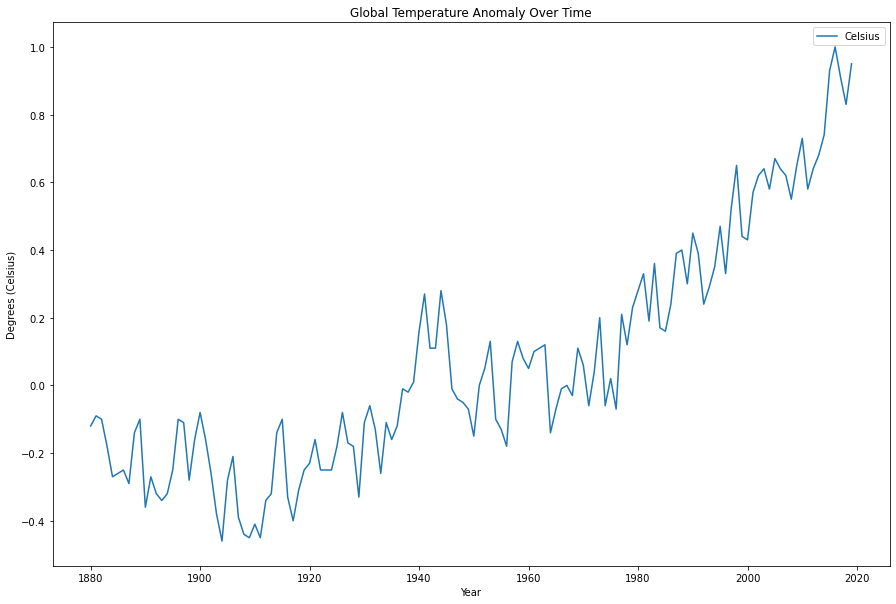

In [14]:
temp_plot = temp_anomaly_df.plot(x="YEAR", y="Celsius", title="Global Temperature Anomaly Over Time", figsize=(15,10))
temp_plot.set_xlabel("Year")
temp_plot.set_ylabel("Degrees (Celsius)")

### Number of Tornadoes in the United States Graph
The following graph shows the number of tornadoes and their intensities that occurred in the United States over a period of time. It appears that over time the number of tornadoes has been increasing. An interesting observation to make note of is just how few tornadoes were recorded from 1950 to about 1960. According to NOAA, about 1000 tornadoes occur annually in the United States. We'll revisit this topic in our analysis phase of the project.

Also to note, the United States changed from the Fujita Scale to the Enhanced Fujita Scale in 2007 to more accurately assess tornado strength and damage output. However, the wind speed for each scale is still somewhat close to each other. [This article](https://weather.com/storms/tornado/news/enhanced-fujita-scale-20130206) does a great job discussing the differences between the two scales, but for the purposes of this project they can be viewed the same.

Text(0, 0.5, 'Number of Tornadoes')

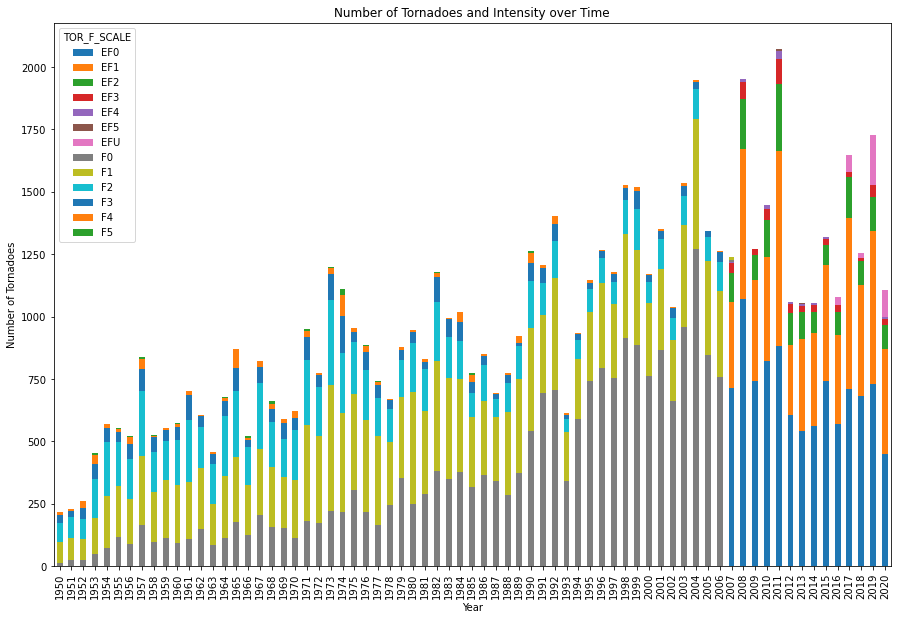

In [15]:
tornado_intensity_group = tornado_df.groupby(["YEAR", "TOR_F_SCALE"])
intensity_df = tornado_intensity_group.size().reset_index(name="counts")
plot = intensity_df.groupby(["YEAR", "TOR_F_SCALE"])["counts"].sum().unstack("TOR_F_SCALE").plot.bar(stacked=True, figsize=(15,10))
plot.set_title("Number of Tornadoes and Intensity over Time")
plot.set_xlabel("Year")
plot.set_ylabel("Number of Tornadoes")

### Number of Wildfires in the United States Graph
The following graph shows the number of wildfires that occurred in the United States over a period of time. We see that there is a large peak right after 2010, but for the most part the number of wildfires appears to remain about the same.

Text(0, 0.5, 'Number of Wildfires')

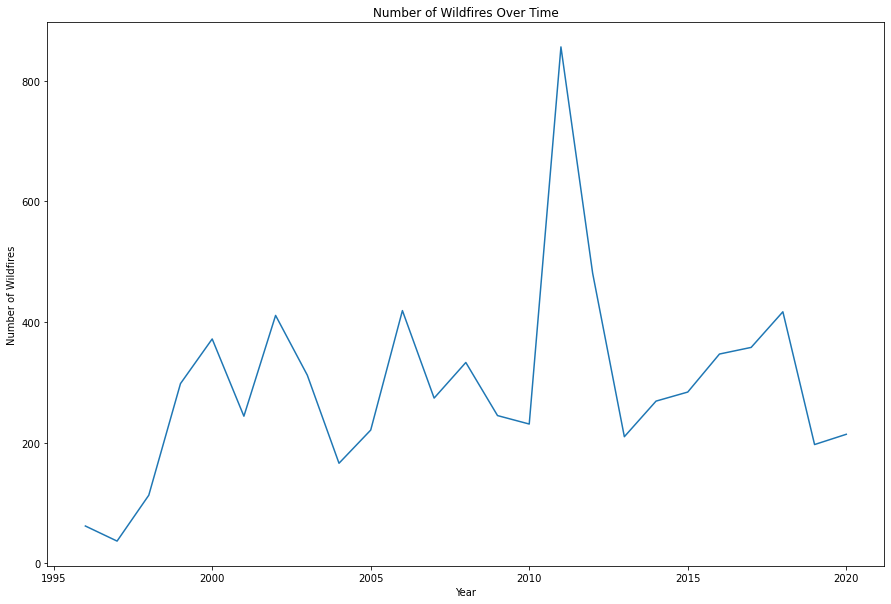

In [16]:
wildfire_group = wildfire_df.groupby("YEAR")
wildfire_plot = wildfire_group.size().plot(title="Number of Wildfires Over Time", figsize=(15,10))
wildfire_plot.set_xlabel("Year")
wildfire_plot.set_ylabel("Number of Wildfires")

### Number of Droughts in the United States Graph
The following graph shows the number of droughts that occurred in the United states over a period of time. An interesting observation is that the drought and wildfire graphs look incredibly similar to each other.

Text(0, 0.5, 'Number of Droughts')

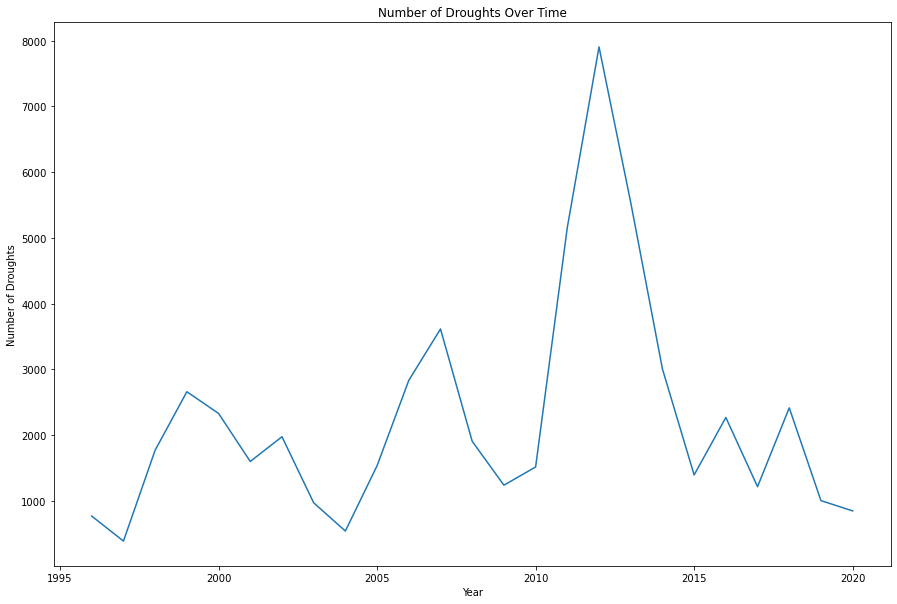

In [35]:
drought_group = drought_df.groupby("YEAR")
drought_plot = drought_group.size().plot(title="Number of Droughts Over Time", figsize=(15,10))
drought_plot.set_xlabel("Year")
drought_plot.set_ylabel("Number of Droughts")

### Number of Tropical Cyclones in the Atlantic Ocean and the Pacific Ocean

The following two graphs show the amount of tropical cyclones that have occurred in the Atlantic Ocean and the Pacific Ocean over the years. At first glance, it appears that both oceans have had an increase in the number of cyclones over time.

Text(0, 0.5, 'Number of Tropical Cyclones')

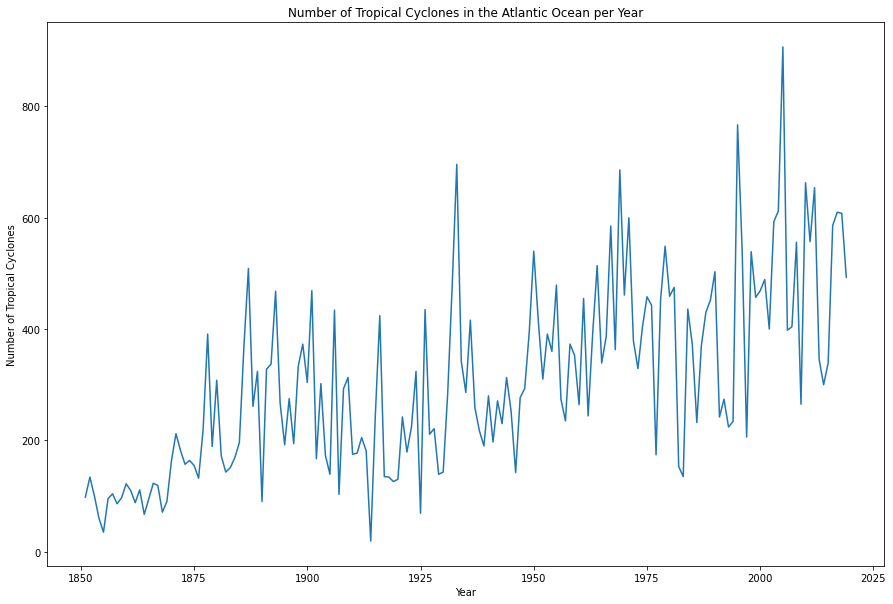

In [36]:
atlantic_group = atlantic_cyclone_df.groupby("YEAR")
atlantic_plot = atlantic_group.size().plot(title="Number of Tropical Cyclones in the Atlantic Ocean per Year", figsize=(15,10))
atlantic_plot.set_xlabel("Year")
atlantic_plot.set_ylabel("Number of Tropical Cyclones")

Text(0, 0.5, 'Number of Tropical Cyclones')

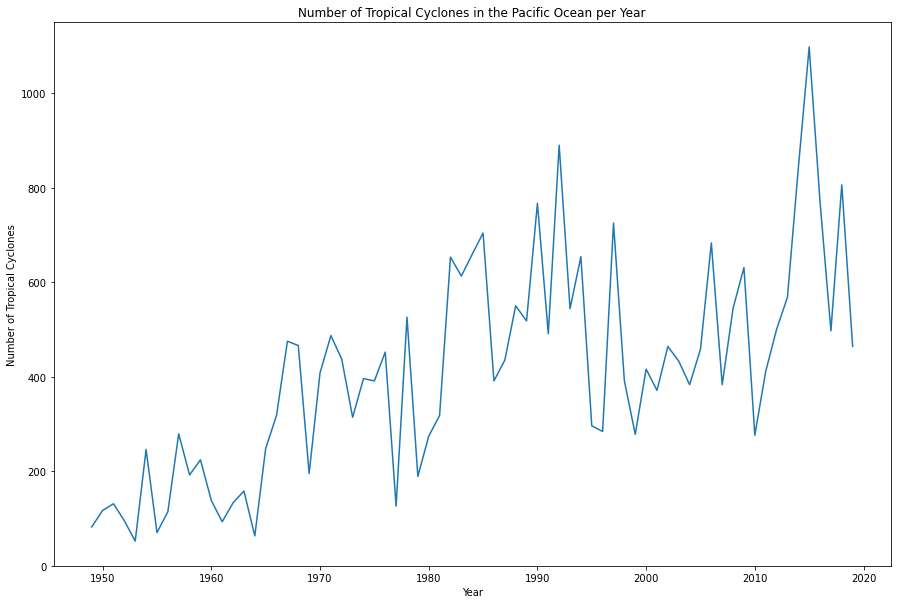

In [19]:
pacific_group = pacific_cyclone_df.groupby("YEAR")
pacific_plot = pacific_group.size().plot(title="Number of Tropical Cyclones in the Pacific Ocean per Year", figsize=(15,10))
pacific_plot.set_xlabel("Year")
pacific_plot.set_ylabel("Number of Tropical Cyclones")

<hr>
<h2><center>Analysis and Hypothesis Testing</center></h2>

Now that we have some numerical data to look at, it's finally time to put it all together to see if the rising global temperature has an effect on the amount of natural disasters that occur. To accomplish this, we will use linear regression in order to view the correlation.

Our null hypothesis will be that the number of natural disasters is not influenced by the global temperature. We will attempt to reject this null hypothesis during each testing of our individual natural disasters.

We will used Ordinary Least Squares (OLS) regression in order to determine if the natural disasters and the rising global temperature are in any way related. If you wish to learn more about OLS regression with Python, feel free to visit [this website.](https://medium.com/@jyotiyadav99111/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01)

### Global Temperature and Number of Tornadoes
We'll merge the tornado dataframe and the global temperature anomaly dataframe together, and then create another dataframe by using the groupby() function on the Year column. This will allow for easier graphing and testing of our data.

In [20]:
# Grouping together the tornado dataframe by year and getting the number of tornadoes each year
group = tornado_df.groupby("YEAR").size().reset_index(name="NUM_TORNADO")

# Merging the tornado dataframe and the global temp anamomoly dataframe
group = pd.merge(group, temp_anomaly_df, on="YEAR")
group.index += 1
group

,YEAR,NUM_TORNADO,Celsius
1,1950,223,-0.15
2,1951,269,0.00
3,1952,272,0.05
4,1953,492,0.13
5,1954,609,-0.10
...,...,...,...
66,2015,1320,0.93
67,2016,1079,1.00
68,2017,1647,0.91
69,2018,1254,0.83


Now that we have a dataframe to perform our testing with, we can use the [statsmodel](https://www.statsmodels.org/stable/index.html) Python import to perform our testing. The main reason that we're using this is to get our Prob (F-statistic) value, also known as a P value. This P value will tell us whether or not the independent (temperature change) and the dependent (number of tornadoes) are in any way related. A smaller value means more relatability.

In [21]:
# Dependent variable is the number of tornadoes and the independent variable is degrees Celsius.
test = smf.ols(formula="NUM_TORNADO ~ Celsius", data=group).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NUM_TORNADO   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     64.22
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           2.07e-11
Time:                        02:44:58   Log-Likelihood:                -492.66
No. Observations:                  70   AIC:                             989.3
Df Residuals:                      68   BIC:                             993.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    739.4950     47.715     15.498      0.000     644.280     834.710
Celsius      878.6269    109.636      8.014      0.000     659.851    1097.403
==============================================================================
Omnibus:                        6.224   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.399
Skew:                           0.591   Prob(JB):                       0.0672
Kurtosis:                       3.674   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Number of Tornadoes For Each Change in Celsius')

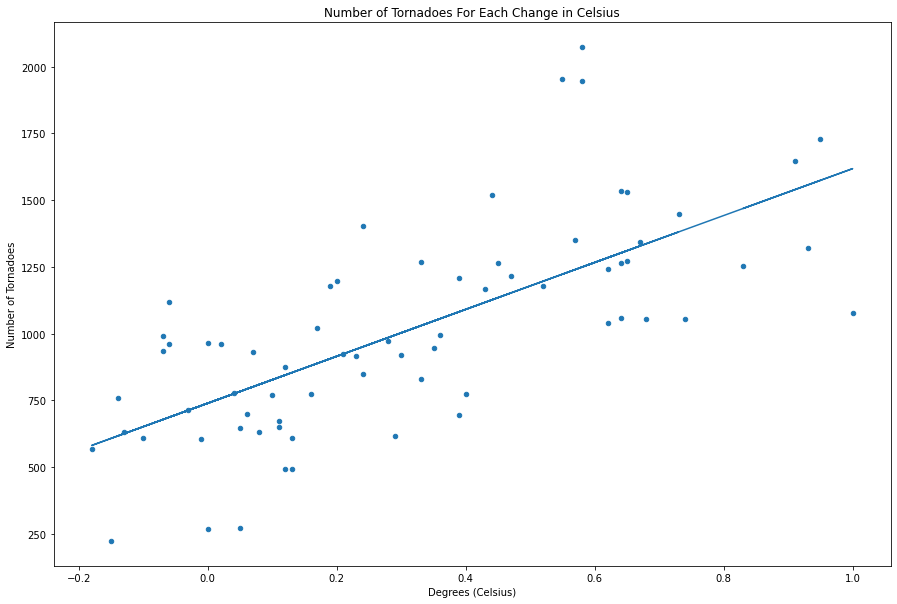

In [22]:
plot = group.plot.scatter(x="Celsius", y="NUM_TORNADO", figsize=(15,10))
reg = LinearRegression().fit(group["Celsius"].values.reshape(-1,1), group["NUM_TORNADO"])
plt.plot(group["Celsius"].values.reshape(-1,1), reg.predict(group["Celsius"].values.reshape(-1,1)))
plot.set_xlabel("Degrees (Celsius)")
plot.set_ylabel("Number of Tornadoes")
plot.set_title("Number of Tornadoes For Each Change in Celsius")

From the OLS Regression Results, we see that our Prob (F-statistic) is 2.07e-11, which is an incredibly small number. This means with the data supplied, there is a correlation between the number of tornadoes and the increasing global temperature. However! There is some bias that is also contained within this data, especially within the first 10 - 20 years. 

As stated earlier in the Visualization phase, NOAA estimates that on average there are about 1000 tornadoes in the United States each year. However, for the first 10 - 20 years of the graph, we see that there are fewer than 1000, with the early-to-mid 1950s only showing a few hundred. Does this mean that there were only 223 tornadoes in the United States in 1950? Probably not. Something that has also evolved during this time has been weather radar and predictions models, which can accurately show if a tornado has been produced by a thunderstorm. So, maybe, the tornadoes that have been reported within the last 20 years are much more accurate than the tornadoes that were reported within the first 20 years of the data. So, just as a test, we'll go ahead and drop 1950 - 1970 and see if that has any effect on our P Value.

In [23]:
# Remove the first 20 indices of the tornado dataframe used above
temp = group.drop(group.index[0:20], axis=0)
# Display the first 5 rows
temp.head()

,YEAR,NUM_TORNADO,Celsius
21,1970,700,0.06
22,1971,963,-0.06
23,1972,778,0.04
24,1973,1198,0.20
25,1974,1120,-0.06


In [24]:
# Dependent variable is the number of tornadoes and the independent variable is degrees Celsius.
new_test = smf.ols(formula="NUM_TORNADO ~ Celsius", data=temp).fit()
new_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NUM_TORNADO   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     20.02
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           4.71e-05
Time:                        02:44:58   Log-Likelihood:                -351.50
No. Observations:                  50   AIC:                             707.0
Df Residuals:                      48   BIC:                             710.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    887.7090     73.906     12.011      0.000     739.111    1036.307
Celsius      647.1550    144.648      4.474      0.000     356.320     937.990
==============================================================================
Omnibus:                        9.375   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.756
Skew:                           0.872   Prob(JB):                       0.0126
Kurtosis:                       4.079   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Number of Tornadoes For Each Change in Celsius')

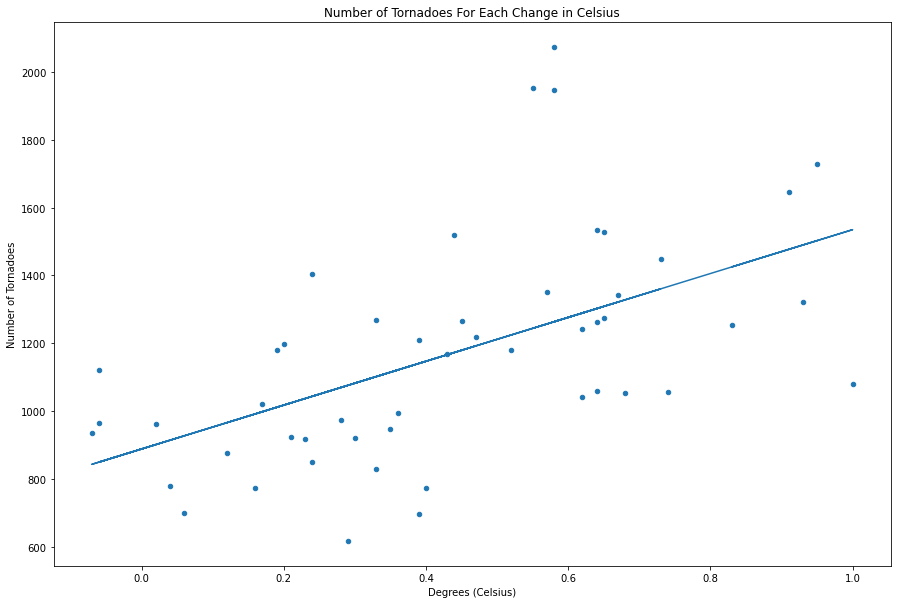

In [25]:
plot = temp.plot.scatter(x="Celsius", y="NUM_TORNADO", figsize=(15,10))
reg = LinearRegression().fit(temp["Celsius"].values.reshape(-1,1), temp["NUM_TORNADO"])
plt.plot(temp["Celsius"].values.reshape(-1,1), reg.predict(temp["Celsius"].values.reshape(-1,1)))
plot.set_xlabel("Degrees (Celsius)")
plot.set_ylabel("Number of Tornadoes")
plot.set_title("Number of Tornadoes For Each Change in Celsius")

Even with removing the first 20 years of data with the fewest amounts of tornadoes per year, our Prob (F-statistic) number still remains low, at 4.71e-05. Not as small as before, but still shows that there is a dependency on the number of tornadoes and the global temperature.

Overall, we can see the heatmap for the number and the intensity of tornadoes. For the purposes of the heatmap, I converted the Enhanced Fujita scale down to the Fujita scale.

<AxesSubplot:xlabel='YEAR', ylabel='TOR_F_SCALE'>

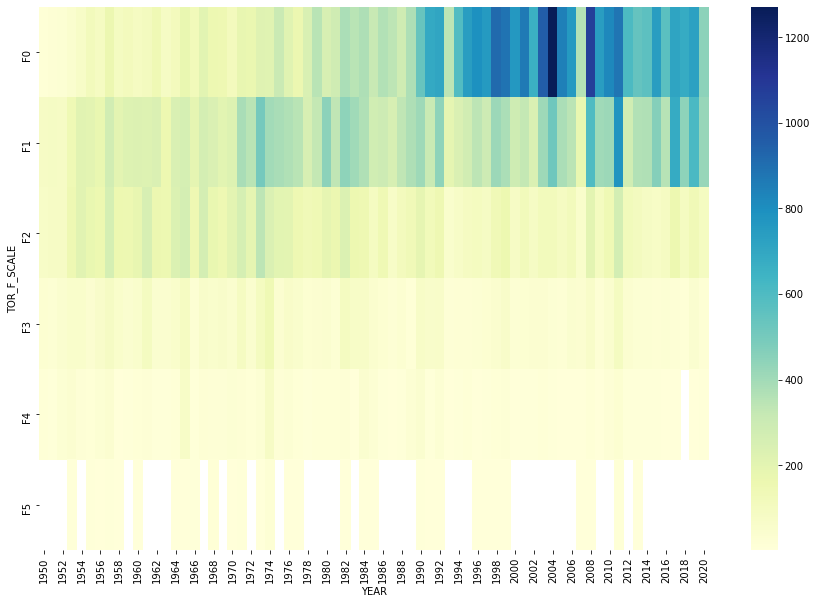

In [26]:
# Grouping the values in the tornado dataframe by their intensisty and year
tornado_intensity_group = tornado_df.groupby(["TOR_F_SCALE", "YEAR"])

# Creating a new data frame based on the grouping with the number of tornadoes for each intensity
intensity_df = tornado_intensity_group.size().reset_index(name="NUM_TORNADO")

# Replacing the EF scale with the F scale
intensity_df.TOR_F_SCALE = intensity_df.TOR_F_SCALE.replace(["EF0","EF1", "EF2", "EF3", "EF4", "EF5"], ["F0", "F1", "F2", "F3", "F4", "F5"])

# get names of indexes for which column TOR_F_SCALE has an EFU
index_names = intensity_df[ intensity_df["TOR_F_SCALE"] == "EFU" ].index 
  
# drop these row indexes from dataFrame 
intensity_df.drop(index_names, inplace = True) 

# Pivot the table to make plotting the heat map easier
piv = pd.pivot_table(intensity_df, values="NUM_TORNADO", index="TOR_F_SCALE", columns="YEAR")

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(piv, cmap="YlGnBu")


By examining the different graphs and the resulting linear regression test, we can confidently reject our null hypothesis that the increase in tornadoes is not related to the increase in temperature. Everything within our tests points to show that although the intensity of the tornadoes has remained relatively consistent according to the heat map, there have been more lower grade tornadoes in the recent years.

### Global Temperature and Number of Wildfires

Next, we will examine if there is any correlation between the number of wildfires and the rising global temperature. Like before, we will once again use OLS Regression in order to find out what our P value is, and then make a determination if we can reject our null hypothesis. We will also generate partial regression plots of our results in order to observe the slope and intercepts of our test.

In [27]:
df = wildfire_df.groupby("YEAR").size().reset_index(name="NUM_WILDFIRES")
df = pd.merge(df, temp_anomaly_df, on="YEAR")

test = smf.ols(formula="NUM_WILDFIRES ~ Celsius", data=df).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NUM_WILDFIRES   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2473
Date:                Sat, 19 Dec 2020   Prob (F-statistic):              0.624
Time:                        02:44:59   Log-Likelihood:                -155.65
No. Observations:                  24   AIC:                             315.3
Df Residuals:                      22   BIC:                             317.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    230.1528    140.971      1.633      0.117     -62.204     522.509
Celsius      102.7253    206.575      0.497      0.624    -325.685     531.136
==============================================================================
Omnibus:                       20.213   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.917
Skew:                           1.650   Prob(JB):                     3.19e-07
Kurtosis:                       7.362   Cond. No.                         8.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

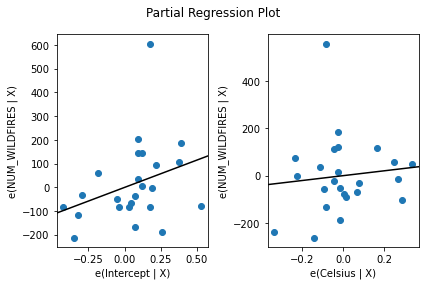

In [28]:
# Plotting the partial regression from the test above
fig = sm.graphics.plot_partregress_grid(test)
fig.tight_layout(pad=1.0)

After examining the P value for our linear regression result, we see that it is relatively high, being only 0.624. This means that we fail to reject our null hypothesis that there would be more wildfires with an increase in global temperature.  We also see that the slope of the lines in the partial regression plots are not very steep which further indicates this.

### Global Temperature and Number of Droughts

We will test droughts in the same exact way as we tested wildfires above.

In [29]:
df = drought_df.groupby("YEAR").size().reset_index(name="counts")
df = pd.merge(df, temp_anomaly_df, on="YEAR")

test = smf.ols(formula="counts ~ Celsius", data=df).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                   0.02780
Date:                Sat, 19 Dec 2020   Prob (F-statistic):              0.869
Time:                        02:44:59   Log-Likelihood:                -212.76
No. Observations:                  24   AIC:                             429.5
Df Residuals:                      22   BIC:                             431.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2563.6192   1522.719      1.684      0.106    -594.307    5721.545
Celsius     -372.0667   2231.345     -0.167      0.869   -4999.592    4255.459
==============================================================================
Omnibus:                       17.389   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.022
Skew:                           1.700   Prob(JB):                     7.40e-05
Kurtosis:                       5.733   Cond. No.                         8.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

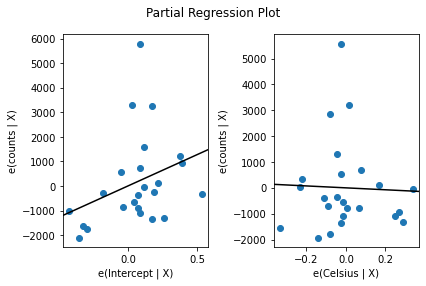

In [30]:
fig = sm.graphics.plot_partregress_grid(test)
fig.tight_layout(pad=1.0)

As with the number of wildfires, we see that our P value is also relatively high, being a value of 0.869. This means that we also fail to reject our null hypothesis that the number of droughts would increase with the rising global temperature. As with the wildfire partial regression plots, our slopes further back this claim.

### Global Temperature and Number of Tropical Cyclones

Finally, we will run OLS regression on our cyclone dataframes, and see if there was an increase in the number of cyclones with the increase of temperature over time. After this, we'll gather the residuals from the results and plot those using a box plot and a violin plot. The residuals basically show the data points that are outside of the line of regression. To learn more about residuals and what they are, [click here.](https://www.statisticshowto.com/residual/#:~:text=A%20residual%20is%20the%20vertical,are%20below%20the%20regression%20line.&text=In%20other%20words%2C%20the%20residual,explained%20by%20the%20regression%20line)

First up, we will run OLS regression on the Atlantic cyclone dataframe to obtain its P value.

In [31]:
# Atlantic Tropical Cyclones
atlantic_df = atlantic_cyclone_df.groupby("YEAR").size().reset_index(name="NUM_CYCLONE")
atlantic_df = pd.merge(atlantic_df, temp_anomaly_df, on="YEAR")

test = smf.ols(formula="NUM_CYCLONE ~ Celsius", data=atlantic_df).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NUM_CYCLONE   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     46.33
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           2.81e-10
Time:                        02:45:00   Log-Likelihood:                -887.66
No. Observations:                 140   AIC:                             1779.
Df Residuals:                     138   BIC:                             1785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    328.3399     11.886     27.623      0.000     304.837     351.843
Celsius      229.5208     33.721      6.806      0.000     162.843     296.198
==============================================================================
Omnibus:                        7.175   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.848
Skew:                           0.522   Prob(JB):                       0.0326
Kurtosis:                       3.290   Cond. No.                         2.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

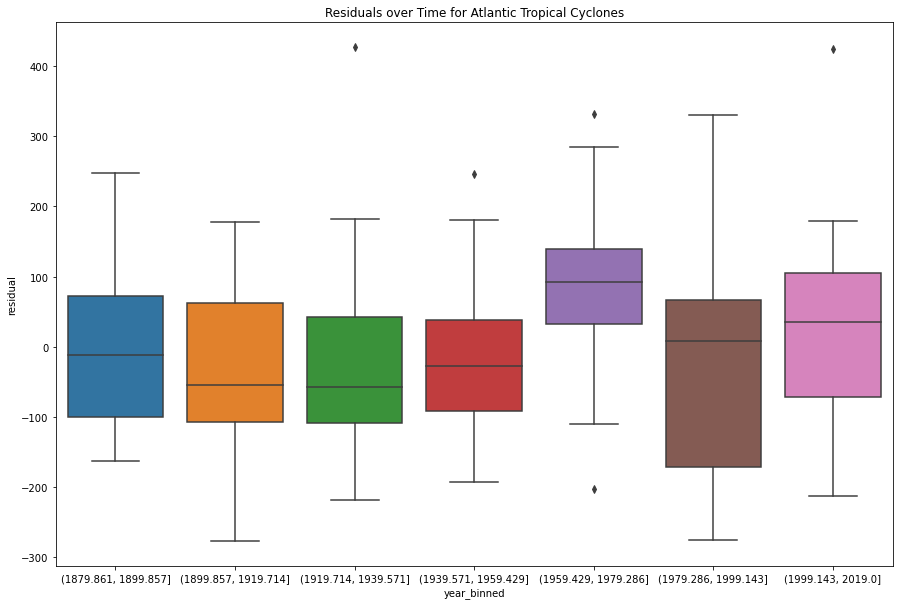

In [32]:
# Binning the years to make plot readable
year = pd.cut(atlantic_df["YEAR"], 7)
atlantic_df["year_binned"] = year

# Creating a new column for the residuals
atlantic_df["residual"] = test.resid

# Plotting the box plot
plt.figure(figsize=(15,10))
sns.boxplot(x=atlantic_df["year_binned"], y=atlantic_df["residual"])
plt.title("Residuals over Time for Atlantic Tropical Cyclones")
plt.show()
plt.close()

Observing the P value from the results, we see that we get a value of 2.81e-10. This is an incredibly small number, and would indicate that there is a dependency between the number of cyclones and the temperature. Thus, we can reject our null hypothesis for the number of cyclones in the Atlantic Ocean with changing temperature. To learn how to read the above box plot, [click here.](https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/)

Next. we will run the same test on the Pacific cyclone dataframe and analyze its results.

In [33]:
# Pacific Tropical Cyclones
pacific_df = pacific_cyclone_df.groupby("YEAR").size().reset_index(name="NUM_CYCLONE")
pacific_df = pd.merge(pacific_df, temp_anomaly_df, on="YEAR")

test = smf.ols(formula="NUM_CYCLONE ~ Celsius", data=pacific_df).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NUM_CYCLONE   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     34.93
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.17e-07
Time:                        02:45:00   Log-Likelihood:                -470.46
No. Observations:                  71   AIC:                             944.9
Df Residuals:                      69   BIC:                             949.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    279.5575     31.045      9.005      0.000     217.624     341.491
Celsius      424.5233     71.828      5.910      0.000     281.231     567.815
==============================================================================
Omnibus:                        4.716   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.648
Skew:                           0.587   Prob(JB):                       0.0979
Kurtosis:                       2.559   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

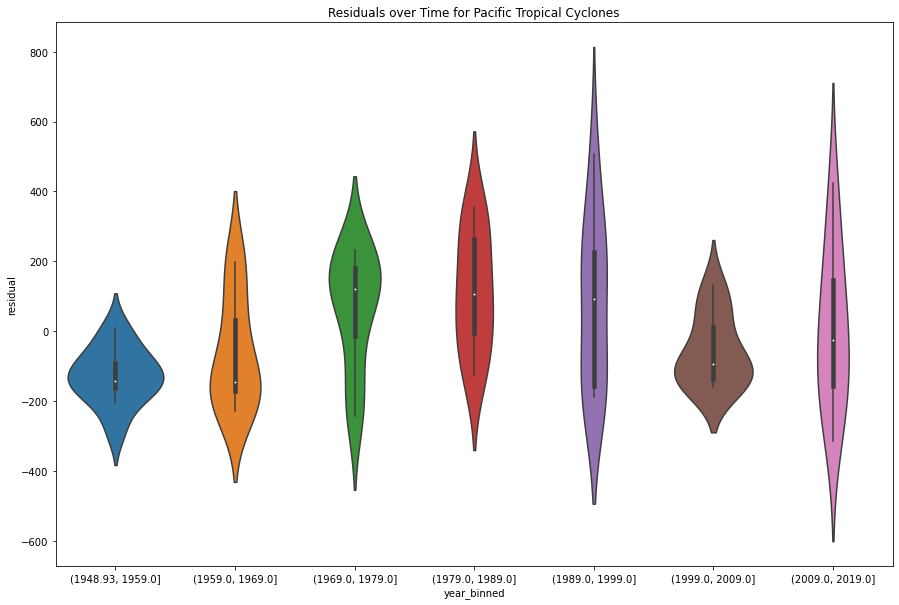

In [34]:
# Binning the years to make plot readable
year = pd.cut(pacific_df["YEAR"], 7)
pacific_df["year_binned"] = year

# Adding a new column for the residuals
pacific_df["residual"] = test.resid

# Plotting the violon plot
plt.figure(figsize=(15,10))
sns.violinplot(x=pacific_df["year_binned"], y=pacific_df["residual"])
plt.title("Residuals over Time for Pacific Tropical Cyclones")
plt.show()
plt.close()

By observing the P value once more, we see that we get a value of 1.17e-07. Since this is a small number, we can also reject the null hypothesis for the number of cyclones in the Pacific Ocean with changing temperature as well. To make sense of what the violin plot is trying to show, please feel free to [click here.](https://mode.com/blog/violin-plot-examples/)

<hr>
<h2><center>Insight and Recommendations</center></h2>

Through the use of the Data Science pipeline, we have been able to observe trends relating to the rising global temperature and the effect that it brings on natural disasters. From the data that we have observed and the mathematical models that we created during our analysis phase, we have come to the following conclusions:

##### Tornadoes in the United States
As stated throughout this project, there is some bias associated with the data that we collected from NOAA. Specifically, some tornadoes may have not been represented in the dataframe, or may have even been counted multiple times from different observers monitoring the storm. However, after correcting for these errors, we still came to the conclusion that the number of tornadoes has risen over the years as the Earth begins to heat up. Based on our model, this will continue to do so if the planet continues to warm.

##### Tropical Cyclones 
We also see that there has been a rise in tropical cyclones which can be more accurately reported, since these events are often massive and can be seen from space and with weather radar. From the mathematical model that we created, the number of tropical cyclones in the Atlantic and Pacific Ocean has continued to rise, and will do so as the Earth continues to warm.

##### Droughts and Wildfires in the United States
According to the examined data and models, it does not appear that these two natural disasters are necessarily tied to global warming due to their high P value. The two are closely related to each other based on their graphs, and thus should be placed on the back burner for now. Potential bias still exists, however, with the lack of data that was presented. The recorded data only dates back to 1996, which may or may not be enough time to witness these trends. They may also both be related to global warming, but will possibly increase with further warming of the planet.

##### Final Recommendations
Further monitoring of the Earth's temperature and natural disasters is required. Although some of the data remains inconclusive, they may change if the temperature continues to steadily rise.